In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [95]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정 (맑은 고딕체)
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지

In [10]:
asdf = pd.read_csv("./data/asdf.csv")
asdf

,마명,승률(%),복승률(%),경주번호,경주명,거리,군(등급),번호,순위,출전두수,주로상태,기록,S1F기록,G3F기록,G1F기록,수득상금,부담중량,마체중,기수,조교사
0,가나패션,0.0,66.6,22-11-13-9,일반,1200,혼4등급,2,3,8,포화,72.6,13.7,36.3,12.4,8400000,51.0,461,김용근,안해양
1,가나패션,0.0,66.6,22-10-09-5,일반,1200,국5등급,7,2,8,다습,74.0,13.6,37.3,12.8,8800000,54.5,463,문세영,안해양
2,가나패션,0.0,66.6,22-08-13-7,일반,1200,국5등급,1,2,12,포화,73.7,13.3,37.5,12.8,8800000,52.5,468,장추열,안해양
3,가나패션,0.0,66.6,22-07-10-4,일반,1300,국5등급,7,3,7,다습,82.1,13.8,39.0,12.8,5600000,52.0,462,다비드,안해양
4,가나패션,0.0,66.6,22-06-11-2,일반,1200,국6등급,7,2,12,건조,75.3,13.7,38.3,12.9,8800000,54.0,459,다비드,안해양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,히트에이스,0.0,16.6,21-06-05-2,일반,1200,국6등급,11,5,13,포화,76.7,13.7,39.3,13.5,1540000,54.0,473,함완식,이관호
10385,히트에이스,0.0,16.6,21-04-24-3,일반,1300,국6등급,2,7,14,건조,83.4,13.5,40.3,14.2,0,55.0,479,함완식,이관호
10386,히트에이스,0.0,16.6,21-01-15-2,일반,1200,국6등급,2,6,12,양호,78.1,13.9,40.8,14.6,0,54.5,471,박현우,이관호
10387,히트파워,50.0,50.0,22-10-02-8,문화일보배(L),1200,국OPEN,11,12,14,양호,75.8,13.5,40.2,14.7,0,55.0,476,최범현,우창구


In [65]:
asdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10389 entries, 0 to 10388
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   마명      10389 non-null  object 
 1   경주번호    10389 non-null  object 
 2   경주명     10389 non-null  object 
 3   거리      10389 non-null  int64  
 4   군(등급)   10389 non-null  object 
 5   번호      10389 non-null  int64  
 6   순위      10389 non-null  int32  
 7   출전두수    10389 non-null  int64  
 8   주로상태    10389 non-null  int64  
 9   기록      10389 non-null  float64
 10  S1F기록   10389 non-null  float64
 11  G3F기록   10389 non-null  float64
 12  G1F기록   10389 non-null  float64
 13  수득상금    10389 non-null  int64  
 14  부담중량    10389 non-null  float64
 15  마체중     10389 non-null  int64  
 16  기수      10389 non-null  object 
 17  조교사     10389 non-null  object 
dtypes: float64(5), int32(1), int64(6), object(6)
memory usage: 1.4+ MB


In [62]:
asdf['순위'] = asdf['순위'].astype(int)

In [47]:
# 주로상태 라벨인코딩
cl = {"건조    " : 0, "양호    " : 1, "다습    " : 2, "포화    " : 3, "불량    " : 4}
asdf['주로상태'] = asdf['주로상태'].replace(cl)
asdf["주로상태"].value_counts()

0    3710
2    2626
1    2375
3    1322
4     356
Name: 주로상태, dtype: int64

In [11]:
asdf.drop(columns=['승률(%)', '복승률(%)'], inplace=True)
asdf

,마명,경주번호,경주명,거리,군(등급),번호,순위,출전두수,주로상태,기록,S1F기록,G3F기록,G1F기록,수득상금,부담중량,마체중,기수,조교사
0,가나패션,22-11-13-9,일반,1200,혼4등급,2,3,8,포화,72.6,13.7,36.3,12.4,8400000,51.0,461,김용근,안해양
1,가나패션,22-10-09-5,일반,1200,국5등급,7,2,8,다습,74.0,13.6,37.3,12.8,8800000,54.5,463,문세영,안해양
2,가나패션,22-08-13-7,일반,1200,국5등급,1,2,12,포화,73.7,13.3,37.5,12.8,8800000,52.5,468,장추열,안해양
3,가나패션,22-07-10-4,일반,1300,국5등급,7,3,7,다습,82.1,13.8,39.0,12.8,5600000,52.0,462,다비드,안해양
4,가나패션,22-06-11-2,일반,1200,국6등급,7,2,12,건조,75.3,13.7,38.3,12.9,8800000,54.0,459,다비드,안해양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,히트에이스,21-06-05-2,일반,1200,국6등급,11,5,13,포화,76.7,13.7,39.3,13.5,1540000,54.0,473,함완식,이관호
10385,히트에이스,21-04-24-3,일반,1300,국6등급,2,7,14,건조,83.4,13.5,40.3,14.2,0,55.0,479,함완식,이관호
10386,히트에이스,21-01-15-2,일반,1200,국6등급,2,6,12,양호,78.1,13.9,40.8,14.6,0,54.5,471,박현우,이관호
10387,히트파워,22-10-02-8,문화일보배(L),1200,국OPEN,11,12,14,양호,75.8,13.5,40.2,14.7,0,55.0,476,최범현,우창구


In [14]:
asdf_sort = asdf.sort_values(by=["경주번호","기록"], ascending=[False,True])
asdf = asdf_sort
asdf

,마명,경주번호,경주명,거리,군(등급),번호,순위,출전두수,주로상태,기록,S1F기록,G3F기록,G1F기록,수득상금,부담중량,마체중,기수,조교사
2701,리월마,22-11-13-9,일반,1200,혼4등급,3,2,8,포화,71.6,13.3,35.6,12.4,13200000,54.0,469,문세영,서홍수
3398,문학스톰,22-11-13-9,일반,1200,혼4등급,1,1,8,포화,71.6,13.3,35.8,12.4,33000000,53.0,525,장추열,정호익
0,가나패션,22-11-13-9,일반,1200,혼4등급,2,3,8,포화,72.6,13.7,36.3,12.4,8400000,51.0,461,김용근,안해양
5829,알렉산더원,22-11-13-9,일반,1200,혼4등급,7,4,8,포화,72.6,14.5,35.8,12.4,3000000,55.5,491,송재철,우창구
327,국제공항,22-11-13-9,일반,1200,혼4등급,4,5,8,포화,73.5,13.9,36.9,13.1,2400000,52.0,472,먼로,강환민
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,제이에스군주,19-09-21-7,일반,1000,혼4등급,5,4,12,건조,61.5,14.6,36.0,12.6,3750000,55.0,494,김동수,박재우
4939,소울메리트,19-09-21-7,일반,1000,혼4등급,3,7,12,건조,62.4,14.1,37.7,13.4,0,55.0,512,송재철,안병기
258,골든서비스,19-09-21-7,일반,1000,혼4등급,10,8,12,건조,62.8,13.8,38.2,13.7,0,55.0,496,안토니오,최용구
6317,옥룡,19-09-21-7,일반,1000,혼4등급,11,9,12,건조,62.9,13.9,38.2,13.8,0,55.0,486,다나카,강성오


In [15]:
asdf = asdf[::-1]
asdf = asdf.reset_index()
asdf.drop(columns='index', inplace=True)
asdf

,마명,경주번호,경주명,거리,군(등급),번호,순위,출전두수,주로상태,기록,S1F기록,G3F기록,G1F기록,수득상금,부담중량,마체중,기수,조교사
0,정문에이스,19-09-21-7,일반,1000,혼4등급,7,12,12,건조,63.5,14.9,37.5,13.3,0,55.0,491,김태훈,홍대유
1,옥룡,19-09-21-7,일반,1000,혼4등급,11,9,12,건조,62.9,13.9,38.2,13.8,0,55.0,486,다나카,강성오
2,골든서비스,19-09-21-7,일반,1000,혼4등급,10,8,12,건조,62.8,13.8,38.2,13.7,0,55.0,496,안토니오,최용구
3,소울메리트,19-09-21-7,일반,1000,혼4등급,3,7,12,건조,62.4,14.1,37.7,13.4,0,55.0,512,송재철,안병기
4,제이에스군주,19-09-21-7,일반,1000,혼4등급,5,4,12,건조,61.5,14.6,36.0,12.6,3750000,55.0,494,김동수,박재우
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,국제공항,22-11-13-9,일반,1200,혼4등급,4,5,8,포화,73.5,13.9,36.9,13.1,2400000,52.0,472,먼로,강환민
10385,알렉산더원,22-11-13-9,일반,1200,혼4등급,7,4,8,포화,72.6,14.5,35.8,12.4,3000000,55.5,491,송재철,우창구
10386,가나패션,22-11-13-9,일반,1200,혼4등급,2,3,8,포화,72.6,13.7,36.3,12.4,8400000,51.0,461,김용근,안해양
10387,문학스톰,22-11-13-9,일반,1200,혼4등급,1,1,8,포화,71.6,13.3,35.8,12.4,33000000,53.0,525,장추열,정호익


In [17]:
asdf["순위"].value_counts()

1       1125
2       1072
3       1063
4       1046
5        980
6        951
7        934
8        867
9        726
10       642
11       490
12       320
13        94
14        50
주행중지      22
실격         3
17         3
16         1
Name: 순위, dtype: int64

In [45]:
#순위의 주행중지, 실격 값을 15로 바꿉니다

asdf = asdf.replace(["주행중지", "실격"], [15, 15])
asdf["순위"].value_counts()

1     1125
2     1072
3     1063
4     1046
5      980
6      951
7      934
8      867
9      726
10     642
11     490
12     320
13      94
14      50
15      25
17       3
16       1
Name: 순위, dtype: int64

In [53]:
asdf['기수'].value_counts()

송재철     543
장추열     453
김용근     437
유승완     414
이혁      411
       ... 
요아니스      1
이강서       1
최은경       1
최시대       1
채상현       1
Name: 기수, Length: 76, dtype: int64

In [75]:
asdf.groupby(['기수'])[['순위', '기록']].mean()

,순위,기록
기수,,
권석원,7.600000,77.880000
김귀배,6.386364,85.259091
김덕현,6.692308,78.107692
김동수,5.855372,86.531405
김아현,6.503876,86.044186
...,...,...
페로비치,3.500000,102.500000
하정훈,6.934211,85.926316
함완식,4.845283,86.536981


In [79]:
asdf[asdf['기수']=='함완식']

,마명,경주번호,경주명,거리,군(등급),번호,순위,출전두수,주로상태,기록,S1F기록,G3F기록,G1F기록,수득상금,부담중량,마체중,기수,조교사
63,옥스퍼드킹,20-06-21-1,일반,1000,국6등급,4,2,12,0,62.2,13.5,38.2,13.8,16500000,55.0,470,함완식,박재우
74,흥드림,20-07-18-1,일반,1000,국6등급,3,6,12,1,62.2,13.1,38.7,14.3,0,55.0,490,함완식,정호익
83,화이트코멧,20-07-19-8,일반,1400,혼4등급,1,3,11,4,86.6,13.3,39.0,13.7,8400000,56.5,487,함완식,정호익
109,두손멍군,20-07-26-6,일반,1200,혼4등급,11,5,12,2,76.2,13.9,39.4,13.9,3000000,54.5,454,함완식,정호익
131,엠제이파워,20-08-23-10,서울마주협회장배(GⅢ),1200,혼OPEN,5,5,15,3,73.0,13.2,37.6,13.2,16000000,57.0,522,함완식,김동균
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,화이트위치,22-11-12-3,일반,1200,국6등급,1,10,11,0,77.2,13.8,40.0,14.2,0,53.0,468,함완식,홍대유
10281,에이스함성,22-11-12-9,일반,1800,국3등급,3,1,11,0,116.8,14.9,38.5,13.0,41250000,58.0,487,함완식,이관호
10286,나올행복,22-11-13-1,일반,1000,국6등급,5,2,12,3,60.9,13.4,36.9,12.9,13200000,53.0,503,함완식,곽영효
10337,피엔에스빌,22-11-13-4,일반,1300,국5등급,6,5,10,3,80.7,13.9,37.8,12.9,2400000,55.5,473,함완식,유재길


# 기수 순위

array([[<AxesSubplot:title={'center':'순위'}>]], dtype=object)

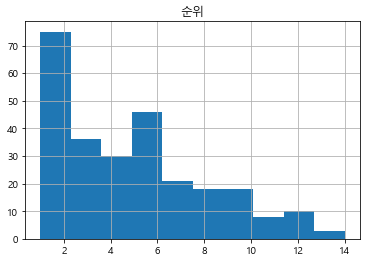

In [96]:
asdf[asdf['기수']=='함완식'].hist(column='순위')

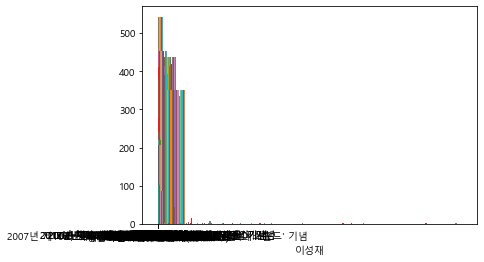

In [110]:
fig = plt.figure(); 
ax = fig.add_subplot(1, 1, 1)
for i in asdf['기수'].unique():
    plt.hist(asdf[asdf['기수'] ==i])
    plt.xlabel(i)
    plt.xlim=(0,15)
    plt.ylim=(0,150)

C:\Users\NTX550\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


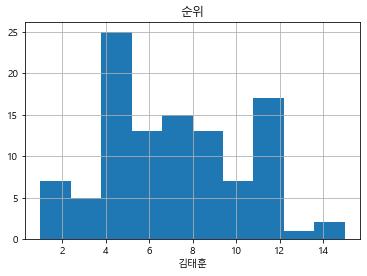

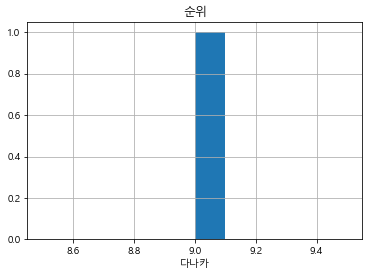

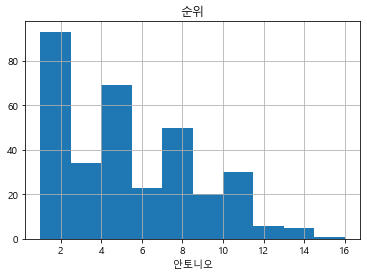

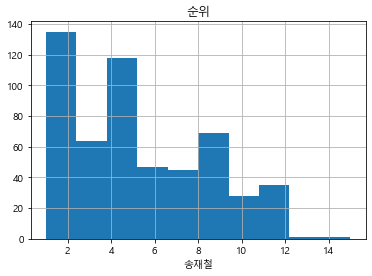

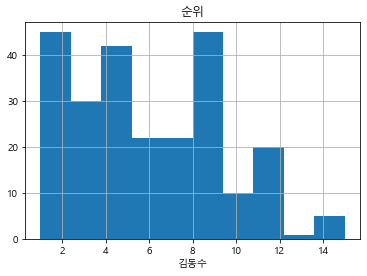

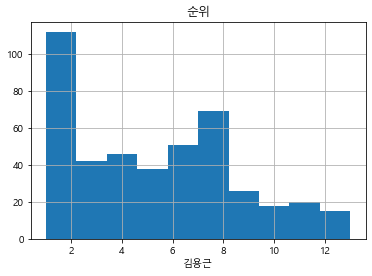

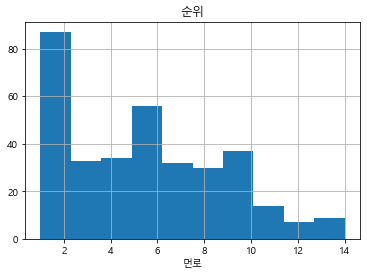

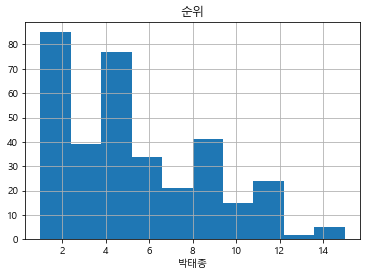

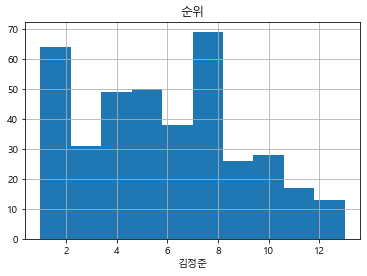

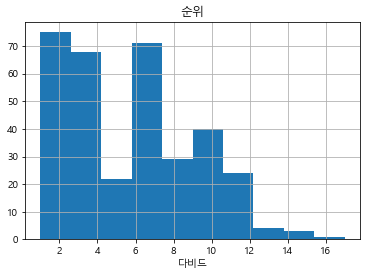

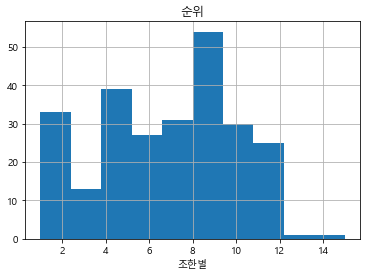

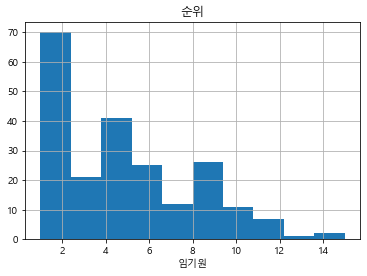

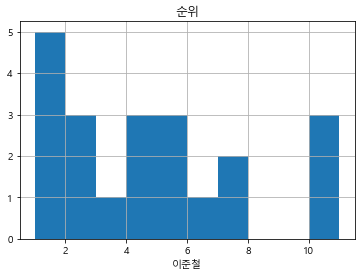

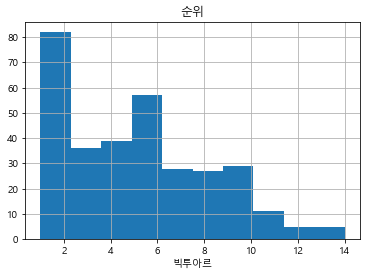

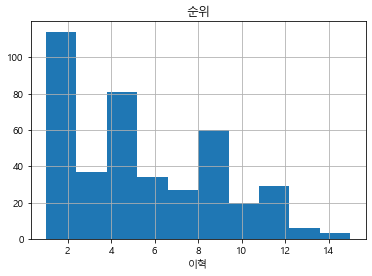

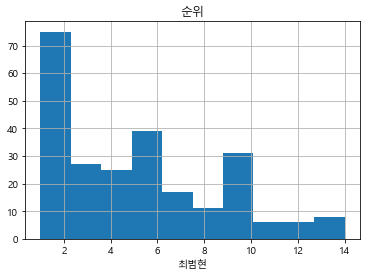

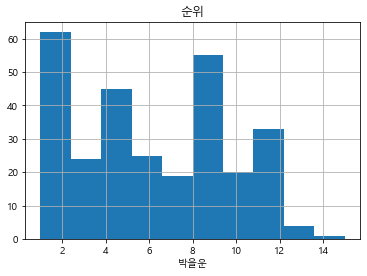

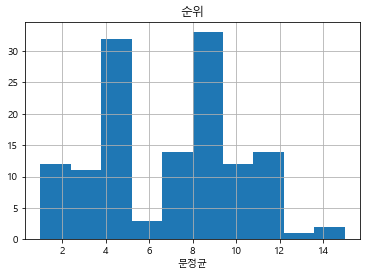

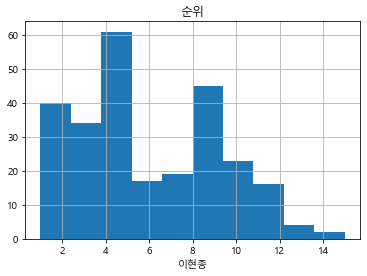

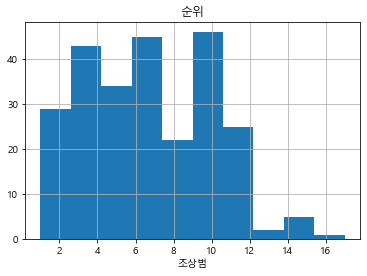

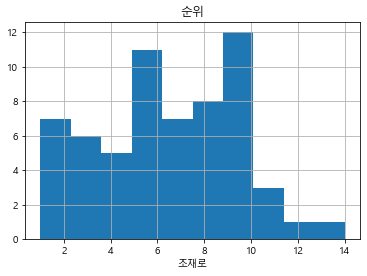

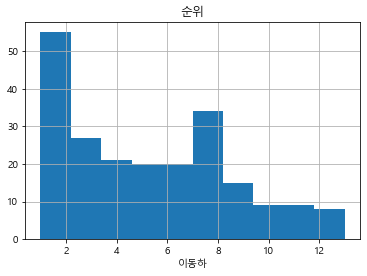

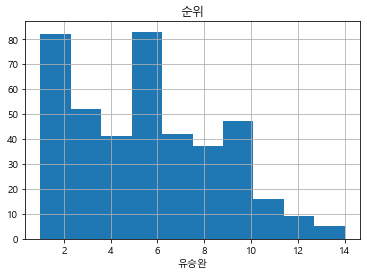

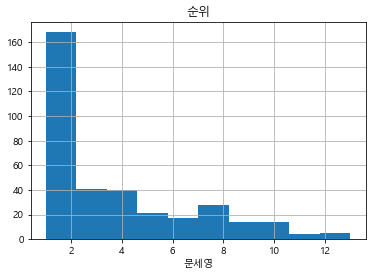

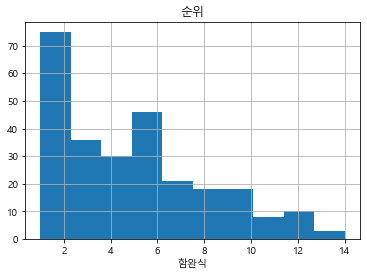

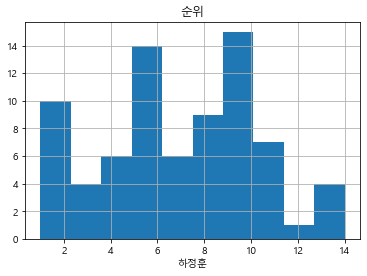

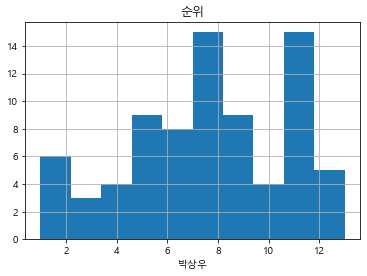

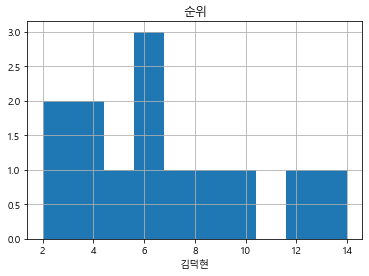

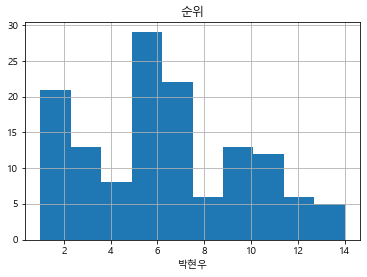

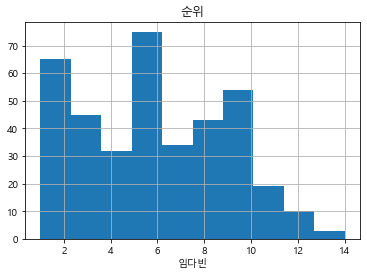

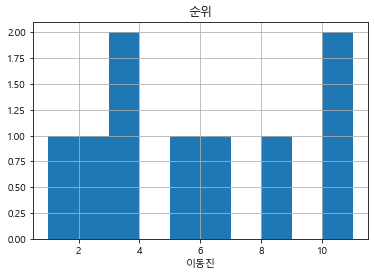

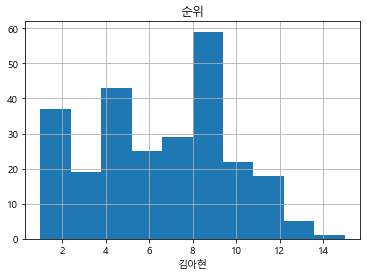

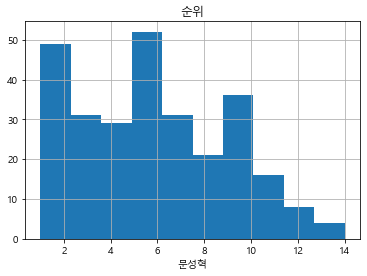

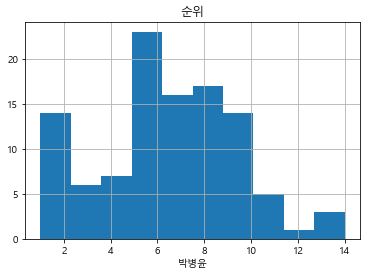

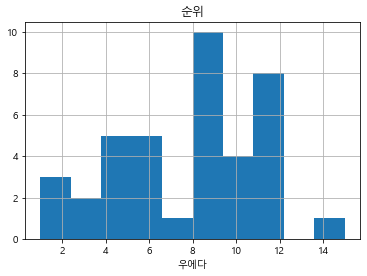

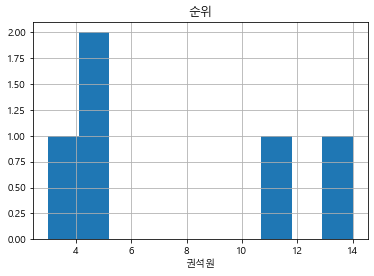

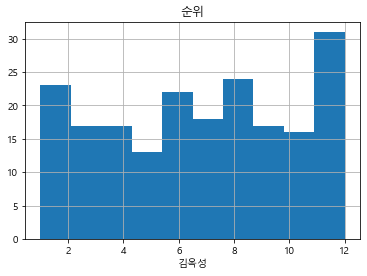

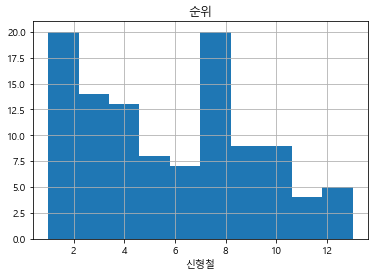

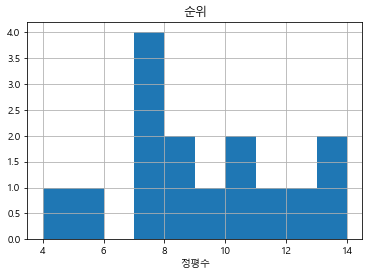

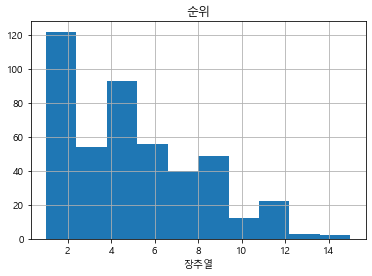

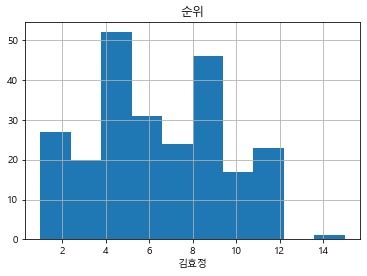

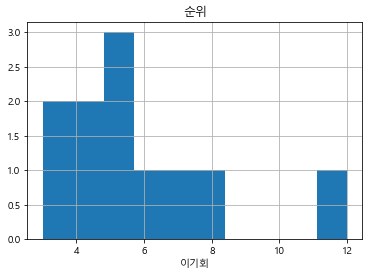

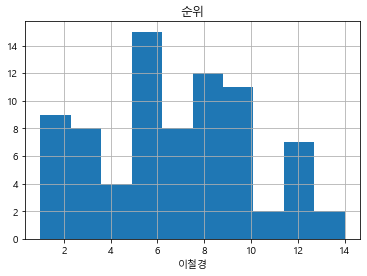

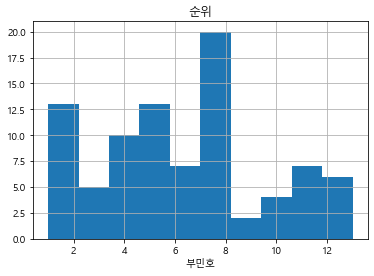

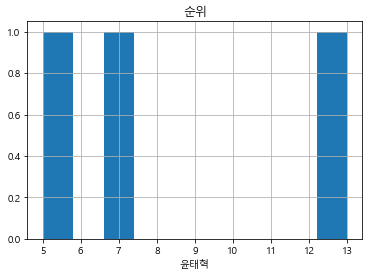

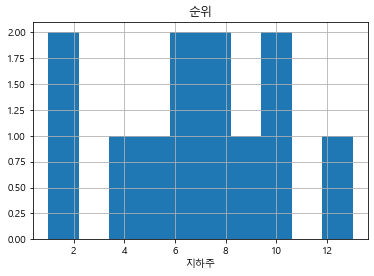

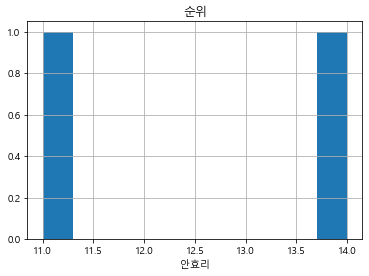

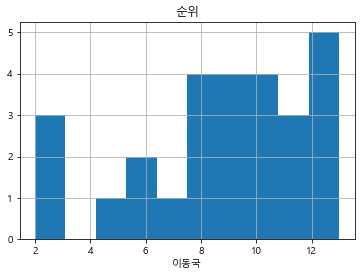

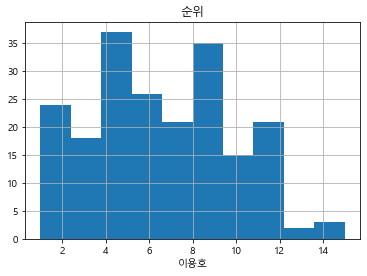

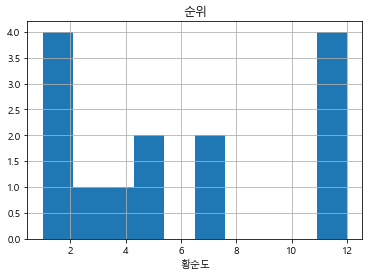

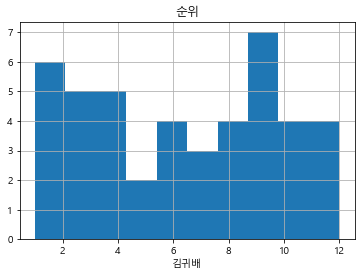

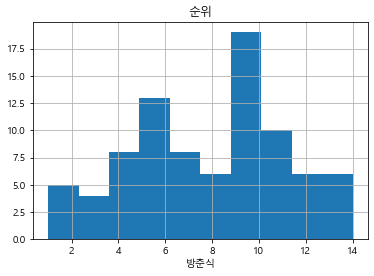

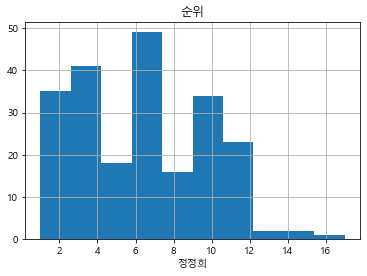

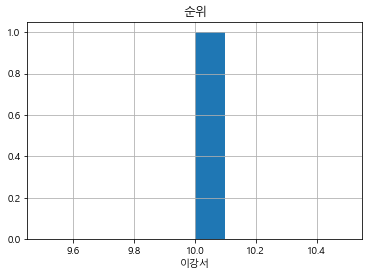

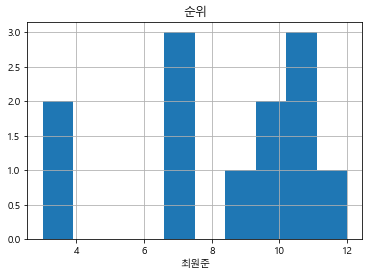

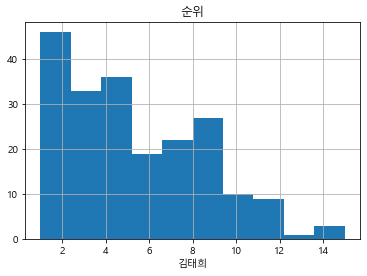

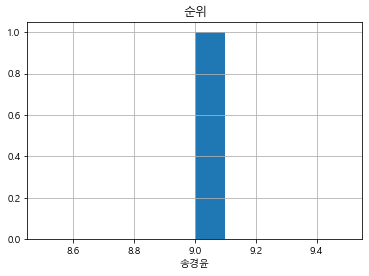

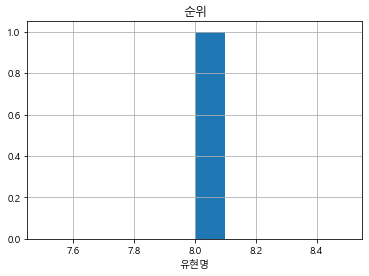

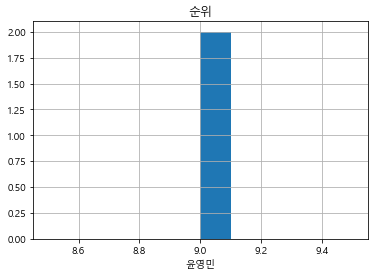

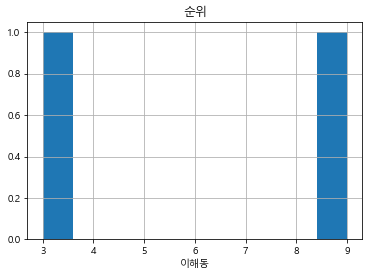

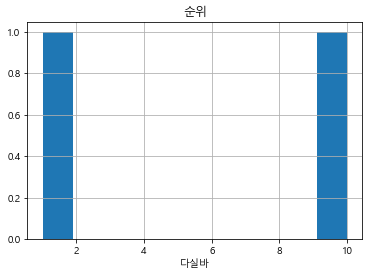

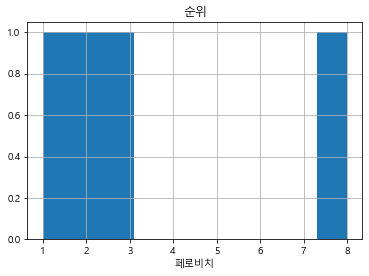

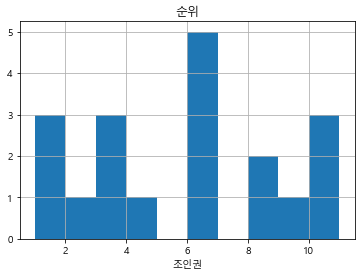

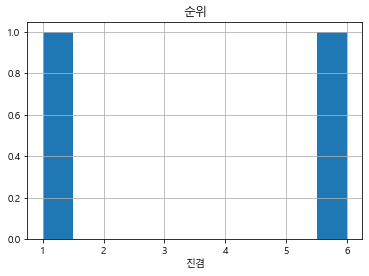

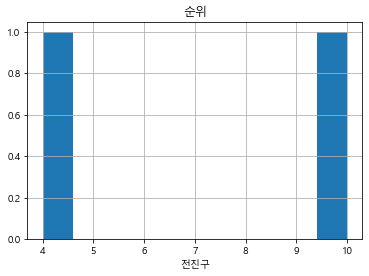

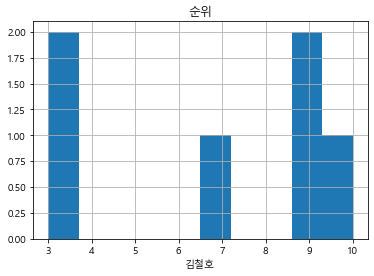

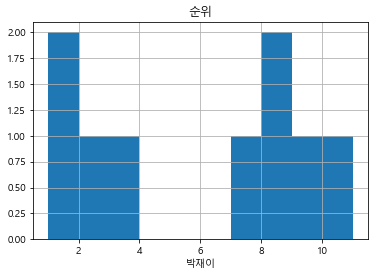

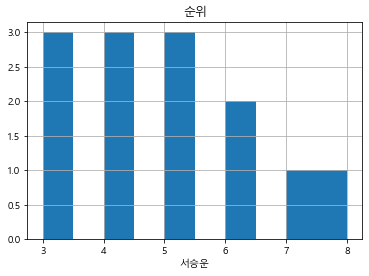

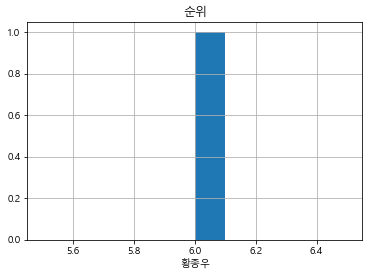

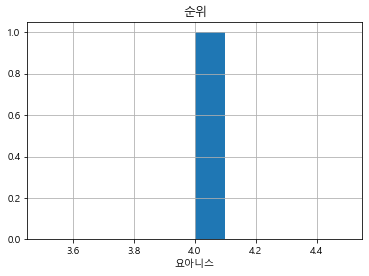

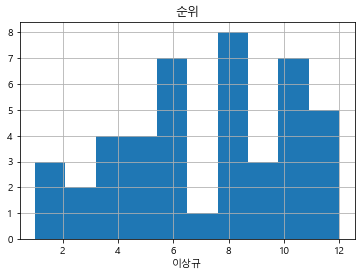

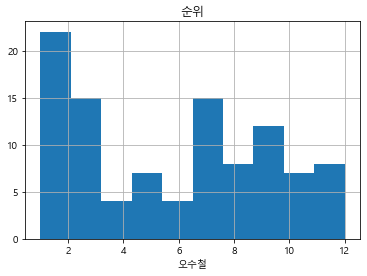

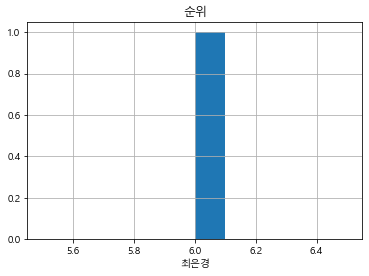

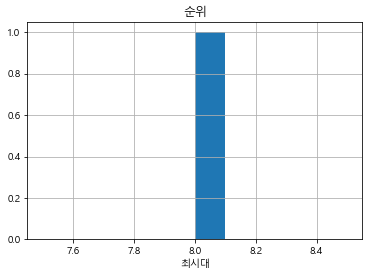

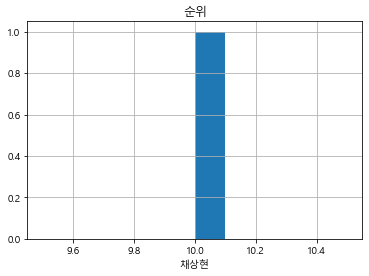

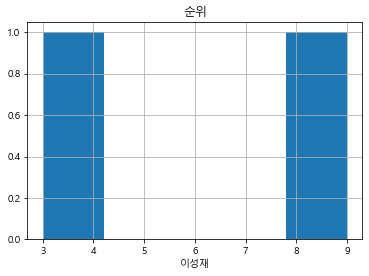

In [109]:
for i in asdf['기수'].unique():
    asdf[asdf['기수'] ==i].hist(column='순위')
    plt.xlabel(i)
    plt.xlim=(0,15)
    plt.ylim=(0,150)

In [83]:
# 말 데이터에 있는 기수 이름들
asdf['기수'].unique()

array(['김태훈', '다나카', '안토니오', '송재철', '김동수', '김용근', '먼로', '박태종', '김정준',
       '다비드', '조한별', '임기원', '이준철', '빅투아르', '이혁', '최범현', '박을운', '문정균',
       '이현종', '조상범', '조재로', '이동하', '유승완', '문세영', '함완식', '하정훈', '박상우',
       '김덕현', '박현우', '임다빈', '이동진', '김아현', '문성혁', '박병윤', '우에다', '권석원',
       '김옥성', '신형철', '정평수', '장추열', '김효정', '이기회', '이철경', '부민호', '윤태혁',
       '지하주', '안효리', '이동국', '이용호', '황순도', '김귀배', '방춘식', '정정희', '이강서',
       '최원준', '김태희', '송경윤', '유현명', '윤영민', '이해동', '다실바', '페로비치', '조인권',
       '진겸', '전진구', '김철호', '박재이', '서승운', '황종우', '요아니스', '이상규', '오수철',
       '최은경', '최시대', '채상현', '이성재'], dtype=object)

In [ ]:
# 기수 데이터에 없는 기수 이름들
result = ['다나카', '이준철','우에다', '권석원','정평수', '이기회', '윤태혁', '지하주',  '이동국',  '황순도', '이강서',
     '최원준',  '송경윤', '유현명', '윤영민', '이해동', '다실바', '페로비치', '조인권','진겸', '전진구', '김철호',
     '박재이', '서승운', '요아니스','최은경', '최시대', '채상현', '이성재']


In [88]:
# 말 데이터에 있는 조교사 이름
mal  = list(asdf['조교사'].unique())
mal

['홍대유',
 '강성오',
 '최용구',
 '안병기',
 '박재우',
 '서홍수',
 '임봉춘',
 '서인석',
 '박종곤',
 '송문길',
 '배대선',
 '최상식',
 '지용철',
 '이관호',
 '김대근',
 '박희철',
 '정호익',
 '유재길',
 '서범석',
 '김동철',
 '박대흥',
 '전승규',
 '최봉주',
 '이희영',
 '김점오',
 '리카디',
 '박윤규',
 '강환민',
 '우창구',
 '김동균',
 '이신영',
 '신삼영',
 '박천서',
 '토니',
 '김윤섭',
 '구자흥',
 '최용건',
 '최영주',
 '박병일',
 '곽영효',
 '임채덕',
 '손영표',
 '안해양',
 '조현수',
 '심승태',
 '서정하',
 '배휴준',
 '이준철',
 '문병기']

In [86]:
# 조교사 데이터에 있는 이름
a = ['강성오', '강환민', '곽영효', '구자흥', '김동균', '김동철', '김윤섭', '리카디', '문병기',
       '박병일', '박윤규', '박재우', '박종곤', '박천서', '박희철', '배대선', '배휴준', '서범석',
       '서인석', '서홍수', '손영표', '송문길', '신삼영', '심승태', '안병기', '안해양', '우창구',
       '유재길', '이관호', '이신영', '이준철', '이희영', '임채덕', '전승규', '정호익', '조현수',
       '최봉주', '최상식', '최영주', '최용건', '최용구', '토니', '홍대유']

['강성오',
 '강환민',
 '곽영효',
 '구자흥',
 '김동균',
 '김동철',
 '김윤섭',
 '리카디',
 '문병기',
 '박병일',
 '박윤규',
 '박재우',
 '박종곤',
 '박천서',
 '박희철',
 '배대선',
 '배휴준',
 '서범석',
 '서인석',
 '서홍수',
 '손영표',
 '송문길',
 '신삼영',
 '심승태',
 '안병기',
 '안해양',
 '우창구',
 '유재길',
 '이관호',
 '이신영',
 '이준철',
 '이희영',
 '임채덕',
 '전승규',
 '정호익',
 '조현수',
 '최봉주',
 '최상식',
 '최영주',
 '최용건',
 '최용구',
 '토니',
 '홍대유']

In [87]:
# 조교사 데이터에 없는 조교사들 ( 추가 데이터 필요한 사람들 )
for i in a:
    if i in mal:
        mal.remove(i)
mal

['임봉춘', '지용철', '김대근', '박대흥', '김점오', '서정하']